In [95]:
import math
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
%matplotlib inline

## Task 1

In [96]:
ga = pd.read_csv('./data/f1clash-general-attributes.csv')
ga.dtypes

name                 object
speed                 int64
cornering             int64
power_unit            int64
reliability           int64
avg_pitstop_time    float64
category             object
dtype: object

In [97]:
ga.count()

name                48
speed               48
cornering           48
power_unit          48
reliability         48
avg_pitstop_time    48
category            48
dtype: int64

In [98]:
ga['team_score'] = ga['speed'] + ga['cornering'] + ga['power_unit'] + ga['reliability'] + ga['avg_pitstop_time']/0.02

ga.head()

,name,speed,cornering,power_unit,reliability,avg_pitstop_time,category,team_score
0,Breakes Wildcore,36,23,33,22,0.59,Breaks,143.5
1,Breakes Suspense,20,32,23,21,0.37,Breaks,114.5
2,Breakes The Warden,26,28,27,25,0.43,Breaks,127.5
3,Breakes Onyx,26,23,25,50,0.49,Breaks,148.5
4,Breakes Axiom,14,34,18,15,0.67,Breaks,114.5


In [99]:
categories = ga['category'].unique()
categories

array(['Breaks', 'GearBox', 'Rear Wing', 'Front Wing', 'Suspension',
       'Engine'], dtype=object)

In [100]:
ga.columns

Index(['name', 'speed', 'cornering', 'power_unit', 'reliability',
       'avg_pitstop_time', 'category', 'team_score'],
      dtype='object')

In [101]:
groups = {category: [
    raw[0] for raw in ga[ga['category'] == category].values
] for category in categories}

print('# elements:', sum([len(groups[key]) for key, value in groups.items()]))

# elements: 48


In [102]:
# All combinations of Breaks x GearBox x Rear Wing x Front Wing x Suspension x Engine
combinations = list(itertools.product(*groups.values()))
combinations = [list(combination) for combination in combinations]
len(combinations)

262144

In [103]:
# DataFrame with all possible combinations of setups
setups = pd.DataFrame(
    data=combinations,
    columns = [item.lower().replace(' ', '_') for item in categories]
)

# Displays first lines
setups.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine
0,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar
1,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Avalanche
2,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine The Rover
3,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Twinburst
4,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Enigma


In [104]:
# Creates a copy of dataset
temp = setups.copy()

# First, create a dictionary for associate 'name' and its 'team_score'
name_to_team_score = ga.set_index('name')['team_score'].to_dict()

# Then, apply map function for each column in setups
for column in ['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']:
    temp[column] = temp[column].map(name_to_team_score)

# Finally, create a column 'sum_team_score' in setups thats sum up all columns of temp
setups['sum_team_score'] = temp[['breaks', 'gearbox', 'rear_wing', 'front_wing', 'suspension', 'engine']].sum(axis=1)

# Displays dataframe
temp.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine
0,143.5,100.0,152.5,148.5,132.5,154.5
1,143.5,100.0,152.5,148.5,132.5,119.5
2,143.5,100.0,152.5,148.5,132.5,130.5
3,143.5,100.0,152.5,148.5,132.5,105.5
4,143.5,100.0,152.5,148.5,132.5,111.5


In [105]:
setups.head()

,breaks,gearbox,rear_wing,front_wing,suspension,engine,sum_team_score
0,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar,831.5
1,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Avalanche,796.5
2,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine The Rover,807.5
3,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Twinburst,782.5
4,Breakes Wildcore,GearBox Voyage,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Enigma,788.5


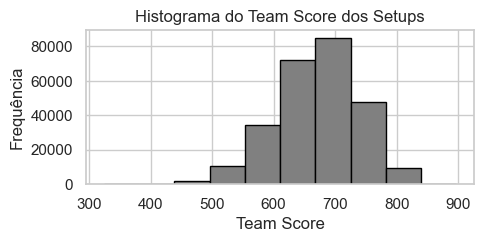

In [106]:
# Histogram of team_score
plt.figure(figsize=(5, 2))
plt.hist(setups['sum_team_score'], bins=10, color='grey', edgecolor='black')

# Plot histogram
plt.xlabel('Team Score')
plt.ylabel('Frequência')
plt.title('Histograma do Team Score dos Setups')
plt.show()

## Task 2

In [107]:
# Histogram cutoff
setups = setups[setups['sum_team_score'] > 880]
setups

,breaks,gearbox,rear_wing,front_wing,suspension,engine,sum_team_score
4112,Breakes Wildcore,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,892.0
4176,Breakes Wildcore,GearBox Vector,Rear Wing Typhoon,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,883.0
4624,Breakes Wildcore,GearBox Vector,Rear Wing Transcendence,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,885.0
102400,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Sigma,Engine Cloudroar,884.0
102416,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,897.0
102480,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,888.0
102544,Breakes Onyx,GearBox Vector,Rear Wing Typhoon,Front Wing Trailblazer,Suspension Horizon,Engine Cloudroar,883.0
102928,Breakes Onyx,GearBox Vector,Rear Wing Transcendence,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,890.0
102992,Breakes Onyx,GearBox Vector,Rear Wing Transcendence,Front Wing Thunderclap,Suspension Horizon,Engine Cloudroar,881.0
110608,Breakes Onyx,GearBox Verdict,Rear Wing Typhoon,Front Wing Virtue,Suspension Horizon,Engine Cloudroar,882.0


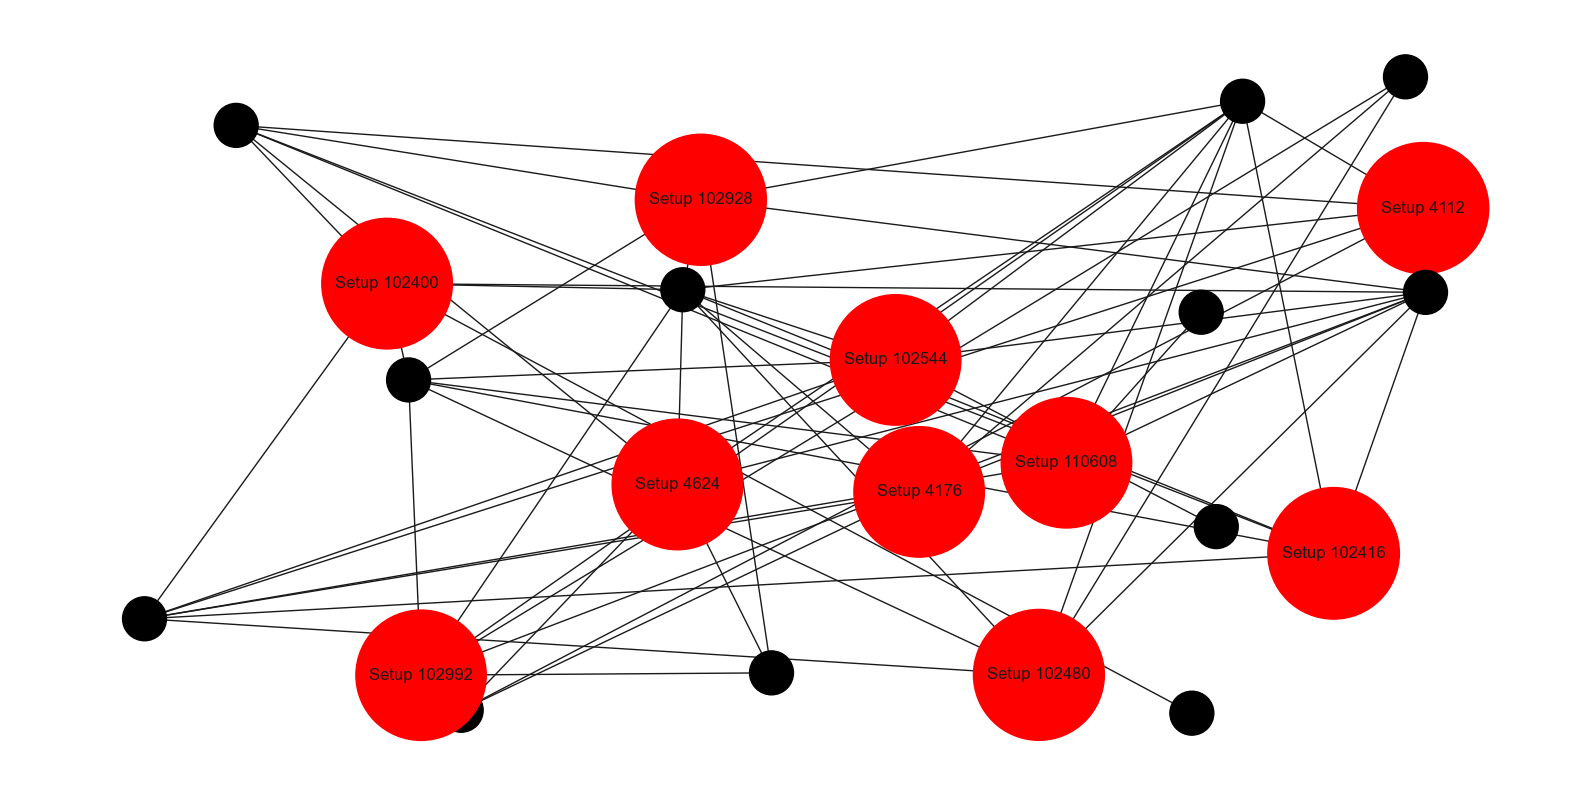

In [108]:
nodes = dict()

# Create links
for index, row in setups.iterrows():
    nodes[index] = [
        row["breaks"], 
        row["gearbox"], 
        row["rear_wing"], 
        row["front_wing"], 
        row["suspension"], 
        row["engine"]]
        
# Built graph
S = nx.DiGraph()
for node, neighbors in nodes.items():
    S.add_node(node)
    S.add_edges_from([(neighbor, node) for neighbor in neighbors])

# Size proportional to Team Score
color_map = []
node_sizes = {}
node_labels = {}
for node in S.nodes():
    if isinstance(node, int):
        node_sizes[node] = 10*setups.loc[int(node)]['sum_team_score']
        node_labels[node] = f"Setup {node}"
        color_map.append("red")
    else:
        node_sizes[node] = 1000
        color_map.append("black")

# Plot graph
pos = nx.random_layout(S, seed=45) 
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx_nodes(S, pos, node_size=[node_sizes[node] for node in S.nodes()], node_color=color_map)
nx.draw_networkx_edges(S, pos)
nx.draw_networkx_labels(S, pos, labels=node_labels)

plt.axis('off')
plt.show()

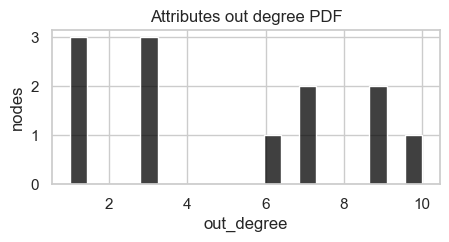

In [109]:
# Filter only nodes relative to attributes
out_degrees = [d for n, d in S.out_degree() if not isinstance(n, int)]

# Plot PDF
sns.set(style="whitegrid")
plt.figure(figsize=(5, 2))
sns.histplot(out_degrees, kde=False, color="black", bins=20)
plt.xlabel("out_degree")
plt.ylabel("nodes")
plt.title("Attributes out degree PDF")
plt.show()

## Task 3

In [110]:
boosts = pd.read_csv('./data/f1clash-boosts.csv')
boosts.head()

,name,defending,tyre_management,reliability,pit_stop_times,cornering,power_unit,speed,race_start,overtaking
0,Tsar,10.0,25.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN
1,Frost,NaN,25.0,10.0,NaN,NaN,NaN,NaN,15.0,NaN
2,Tulip,10.0,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN
3,Dragon,NaN,15.0,NaN,NaN,NaN,15.0,NaN,NaN,20.0
4,Kawaii,NaN,NaN,NaN,15.0,20.0,NaN,NaN,15.0,NaN


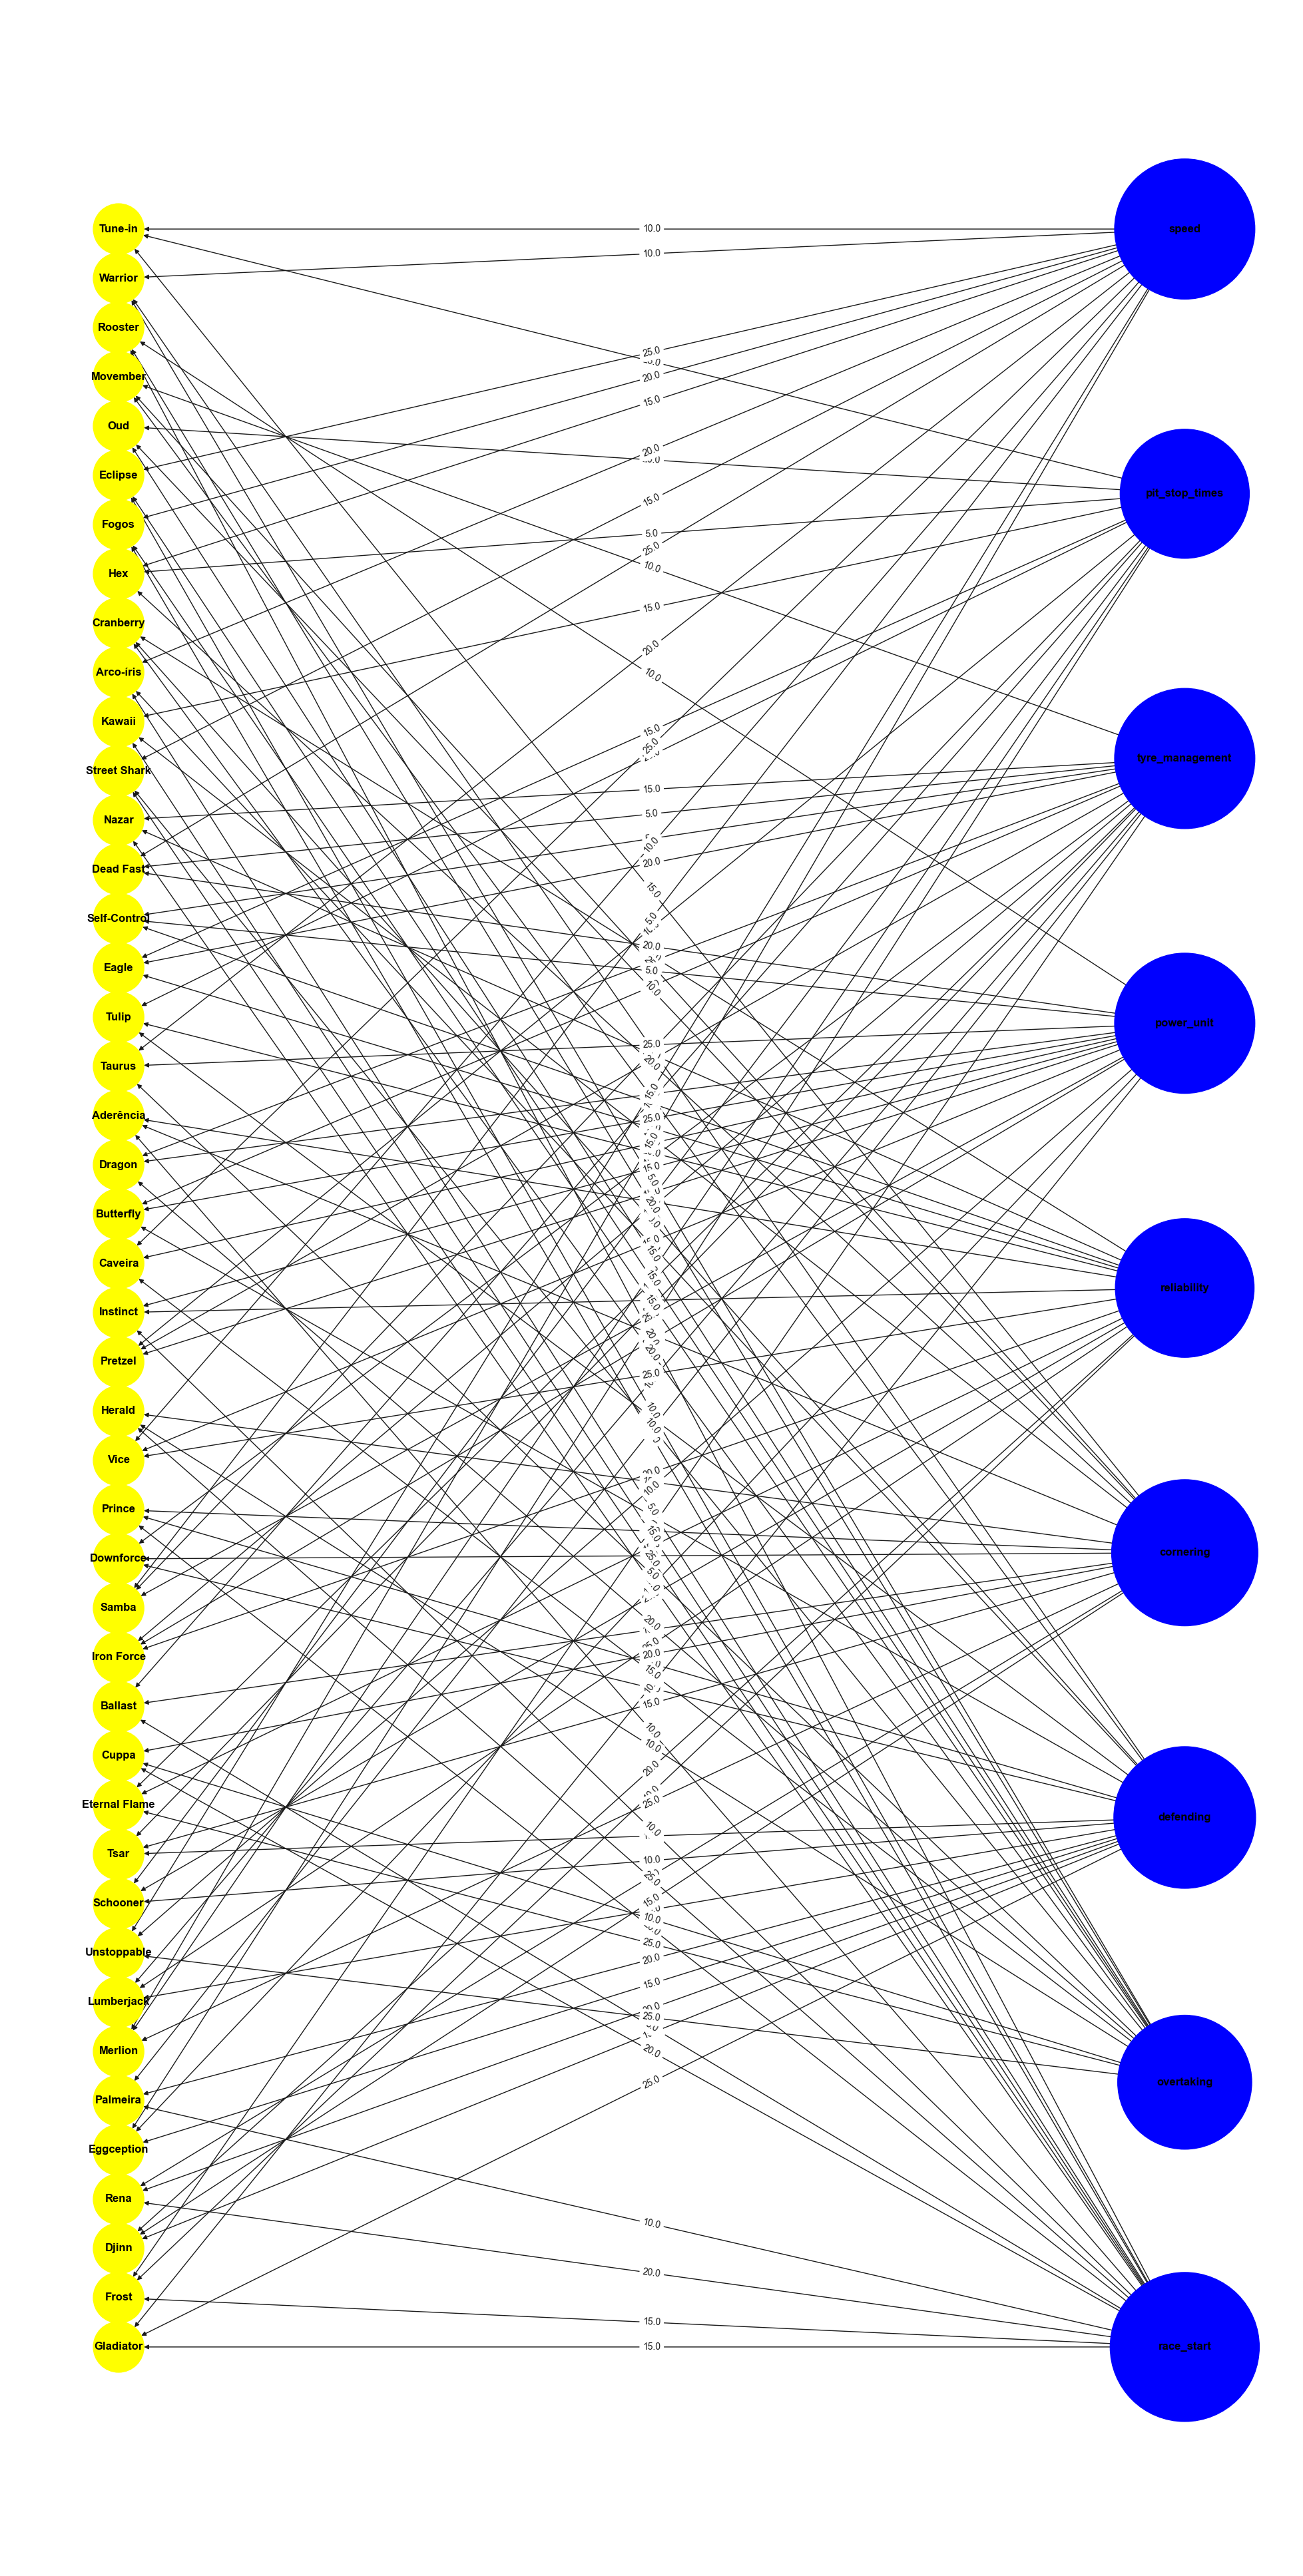

In [111]:
# Create links
nodes = dict()
for index, row in boosts.iterrows():
    neighbors = []
    if (not math.isnan(row["defending"])):
        neighbors.append("defending")
    if (not math.isnan(row["tyre_management"])): 
        neighbors.append("tyre_management")
    if (not math.isnan(row["reliability"])): 
        neighbors.append("reliability")
    if (not math.isnan(row["pit_stop_times"])):
        neighbors.append("pit_stop_times")
    if (not math.isnan(row["cornering"])):
        neighbors.append("cornering")
    if (not math.isnan(row["power_unit"])):
        neighbors.append("power_unit")
    if (not math.isnan(row["speed"])):
        neighbors.append("speed")        
    if (not math.isnan(row["race_start"])):
        neighbors.append("race_start")        
    if (not math.isnan(row["overtaking"])):
        neighbors.append("overtaking")        
    nodes[row["name"]] = neighbors
        
# Built graph
B = nx.DiGraph()

# Bipartite setup
B.add_nodes_from(boosts['name'].unique(),bipartite=0)
B.add_nodes_from(boosts.columns[1:], bipartite=1)

# Add weightned edges
for node, neighbors in nodes.items():
    B.add_node(node)
    B.add_weighted_edges_from([(neighbor, node, boosts.loc[boosts['name'] == node, neighbor].iloc[0]) for neighbor in neighbors])

# Size of boosts proportional to out degree sum
color_map = []
node_sizes = {}
for node in B.nodes():
    if node in boosts['name'].unique():
        node_sizes[node] = 3000
        color_map.append("yellow")
    else:
        total_degree = sum(d["weight"] for _, _, d in B.edges(node, data=True))
        node_sizes[node] = total_degree * 100
        color_map.append("blue")

# Draw graph
fig, ax = plt.subplots(figsize=(25, 50))
pos = nx.bipartite_layout(B, set(boosts['name'].unique()))
nx.draw(B, pos, 
        with_labels=True, 
        node_color=color_map, 
        node_size=[node_sizes[node] for node in B.nodes()], 
        font_size=12,
        font_color='black', 
        font_weight='bold')

# Show weights on edges
edge_labels = {(u, v): d["weight"] for u, v, d in B.edges(data=True)}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_size=10)

# Plot
plt.axis('off')
plt.show()

## Task 4

Considering only what has been seen so far, propose a solution to find the best setup: Parts + Drivers + Boost. Assume that 

```
Team Score = Sum of the metrics of the 2 drivers + speed + cornering + power unit + reliability + (avg pit stop)/0.02.
```

Tip: speed + cornering is a good metric

In [113]:
drivers = pd.read_csv('./data/f1clash-drivers.csv')

drivers

,name,overtaking,defending,qualifying,race_start,tyre_management
0,Max Verstappen,97.0,86.0,99.0,89.0,94.0
1,Charles Leclerc,93.0,99.0,97.0,87.0,89.0
2,Fernando Alonso,99.0,92.0,89.0,97.0,88.0
3,Lewis Hamilton,81.0,86.0,89.0,94.0,90.0
4,Lando Norris,99.0,95.0,99.0,99.0,99.0
5,George Russel,95.0,90.0,91.0,83.0,86.0
6,Sergio Perez,85.0,96.0,89.0,91.0,84.0
7,Carlos Sainz,84.0,85.0,95.0,90.0,91.0
8,Lance Stroll,92.0,83.0,87.0,94.0,89.0
9,Pierre Gasly,88.0,93.0,83.0,85.0,96.0
